# Exploratory Analysis

In [1]:
import pandas as pd

xactions_file = 'data/train_2016.csv'
xactions = pd.read_csv(xactions_file, parse_dates=['transactiondate'])
xactions.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [2]:
properties_only_file = 'data/properties_2016.csv'
# TODO: Set data type of mixed columns
properties_only = pd.read_csv(properties_only_file)
properties_only.shape

/Users/jtb/anaconda/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [3]:
properties_only.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [4]:
# Join two files on parcelid
properties = pd.merge(xactions, properties_only, how='inner', on='parcelid')
properties.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


# Rename columns to be friendlier

In [5]:
properties.rename(columns={'yearbuilt': 'build_year',
                        'basementsqft': 'area_basement',
                        'yardbuildingsqft17': 'area_patio',
                        'yardbuildingsqft26': 'area_shed',
                        'poolsizesum': 'area_pool',
                        'lotsizesquarefeet': 'area_lot',
                        'garagetotalsqft': 'area_garage',
                        'finishedfloor1squarefeet': 'area_firstfloor_finished',
                        'calculatedfinishedsquarefeet': 'area_total_calc',
                        'finishedsquarefeet6': 'area_base',
                        'finishedsquarefeet12': 'area_live_finished',
                        'finishedsquarefeet13': 'area_liveperi_finished',
                        'finishedsquarefeet15': 'area_total_finished',
                        'finishedsquarefeet50': 'area_unknown',
                        'unitcnt': 'num_unit',
                        'numberofstories': 'num_story',
                        'roomcnt': 'num_room',
                        'bathroomcnt': 'num_bathroom',
                        'bedroomcnt': 'num_bedroom',
                        'calculatedbathnbr': 'num_bathroom_calc',
                        'fullbathcnt': 'num_bath',
                        'threequarterbathnbr': 'num_75_bath',
                        'fireplacecnt': 'num_fireplace',
                        'poolcnt': 'num_pool',
                        'garagecarcnt': 'num_garage',
                        'regionidcounty': 'region_county',
                        'regionidcity': 'region_city',
                        'regionidzip': 'region_zip',
                        'regionidneighborhood': 'region_neighbor',
                        'taxvaluedollarcnt': 'tax_total',
                        'structuretaxvaluedollarcnt': 'tax_building',
                        'landtaxvaluedollarcnt': 'tax_land',
                        'taxamount': 'tax_property',
                        'assessmentyear': 'tax_year',
                        'taxdelinquencyflag': 'tax_delinquency',
                        'taxdelinquencyyear': 'tax_delinquency_year',
                        'propertyzoningdesc': 'zoning_property',
                        'propertylandusetypeid': 'zoning_landuse',
                        'propertycountylandusecode': 'zoning_landuse_county',
                        'fireplaceflag': 'flag_fireplace',
                        'hashottuborspa': 'flag_tub',
                        'buildingqualitytypeid': 'quality',
                        'buildingclasstypeid': 'framing',
                        'typeconstructiontypeid': 'material',
                        'decktypeid': 'deck',
                        'storytypeid': 'story',
                        'heatingorsystemtypeid': 'heating',
                        'airconditioningtypeid': 'aircon',
                        'architecturalstyletypeid': 'architectural_style'},
                 inplace=True)
properties.head()

,parcelid,logerror,transactiondate,aircon,architectural_style,area_basement,num_bathroom,num_bedroom,framing,quality,...,num_story,flag_fireplace,tax_building,tax_total,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


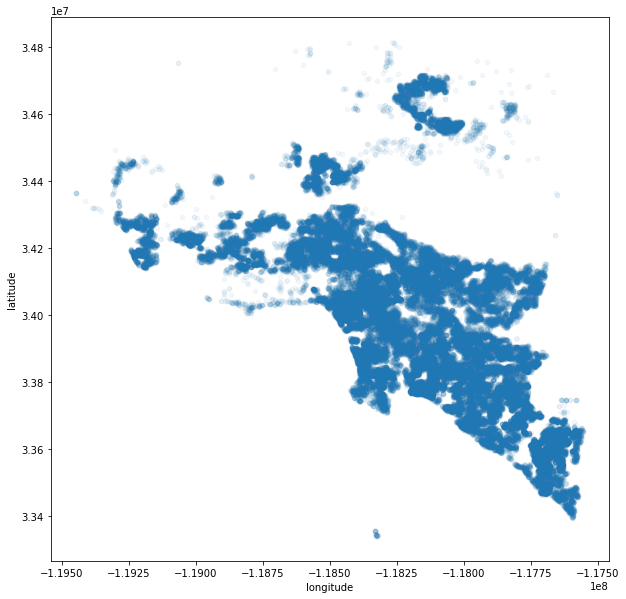

In [6]:
# Plot data geographically - includes LA, Orange, and Ventura counties
%matplotlib inline
import matplotlib.pyplot as plt

properties.plot(kind='scatter', x='longitude', y='latitude', alpha=0.05, figsize=(10, 10))
plt.show()

In [7]:
# TODO: Fix this nonsense.  My goal is to squeeze logerror values into (-1, 1) range for a better-looking histogram
# Removing outliers will mostly fix it.

standardized_logerror = (properties['logerror'] - properties['logerror'].mean()) / properties['logerror'].std()
#standardized_logerror = (properties['logerror'] - properties['logerror'].mean())


#print(properties['logerror'].mean())    # 0.0108164715728
#print(properties['logerror'].std())     # 0.163287609286
print()

#11617445    4.726184
#12668867    4.509184
#12668872    4.434184
#11538524    3.957184
#11743456    3.432184

standardized_logerror.sort_values(ascending=False).head()
#properties['logerror'].sort_values(ascending=False).head()

7342     28.943920
22669    27.614977
22668    27.155664
8652     24.234439
87873    21.019253
Name: logerror, dtype: float64

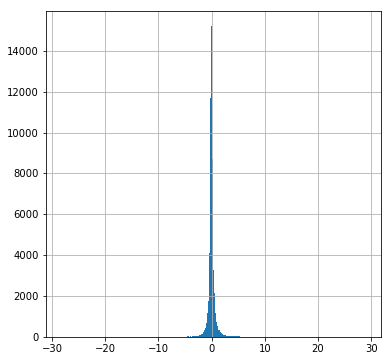

In [8]:
standardized_logerror.hist(bins=500, figsize=(6, 6))
plt.show()

# Prep and clean data

## Drop columns with too many missing values

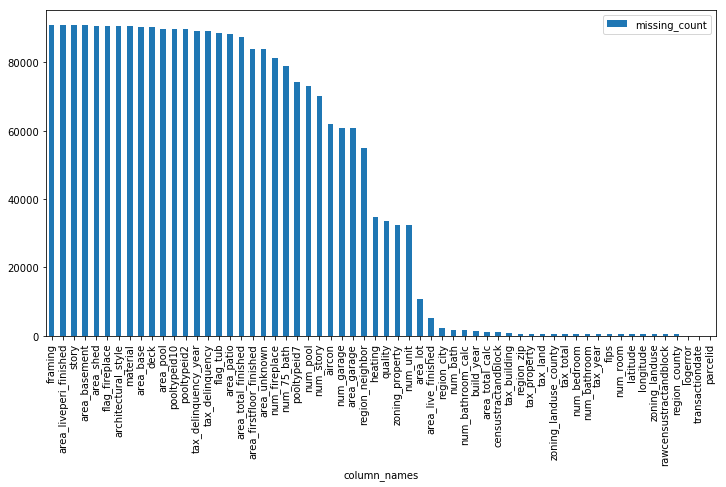

In [9]:
def get_missing(df):
    missing_df = df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_names', 'missing_count']
    missing_df = missing_df.set_index('column_names')  # <-- [Tyler] Repeated coding mistake to correct: MUST ASSIGN TO NEW VAR for most pandas ops
    missing_df = missing_df.sort_values(by='missing_count', ascending=False)

    return missing_df

missing = get_missing(properties)
missing.plot.bar(figsize=(12, 6))
plt.show()

In [10]:
missing['missing_ratio'] = missing['missing_count'] / properties.shape[0]
good_columns = missing.loc[missing['missing_ratio'] < 0.50]
props_clean = properties[good_columns.index.values]
props_clean.shape

(90811, 31)

## Separate features and target prediction

In [11]:
props_clean = props_clean.drop('logerror', axis=1)
props_labels = properties['logerror'].copy()

## Look at data types

In [12]:
data_types = props_clean.dtypes.reset_index()
data_types.columns = ['Count', 'Column Data Type']
data_types

,Count,Column Data Type
0,heating,float64
1,quality,float64
2,zoning_property,object
3,num_unit,float64
4,area_lot,float64
5,area_live_finished,float64
6,region_city,float64
7,num_bath,float64
8,num_bathroom_calc,float64
9,build_year,float64


In [13]:
data_types.groupby('Column Data Type').aggregate('count').reset_index()

,Column Data Type,Count
0,float64,26
1,datetime64[ns],1
2,int64,1
3,object,2


## Fill in missing values for numeric features

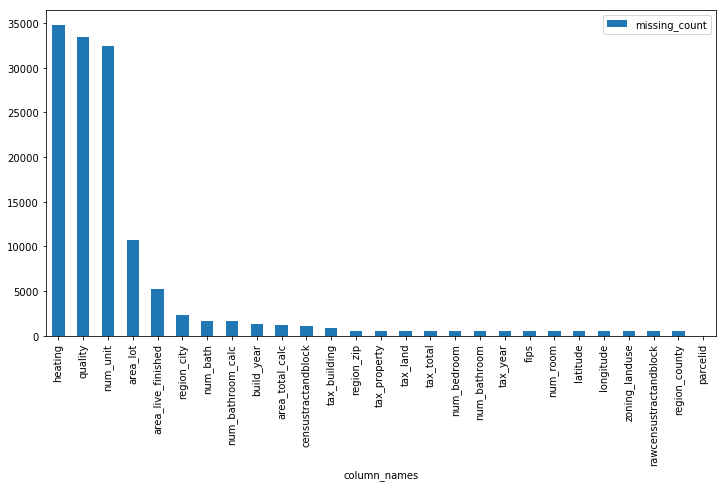

In [14]:
props_clean_num = props_clean.drop(['zoning_property', 'zoning_landuse_county', 'transactiondate'], axis=1)

missing = get_missing(props_clean_num)
missing.plot.bar(figsize=(12, 6))
plt.show()

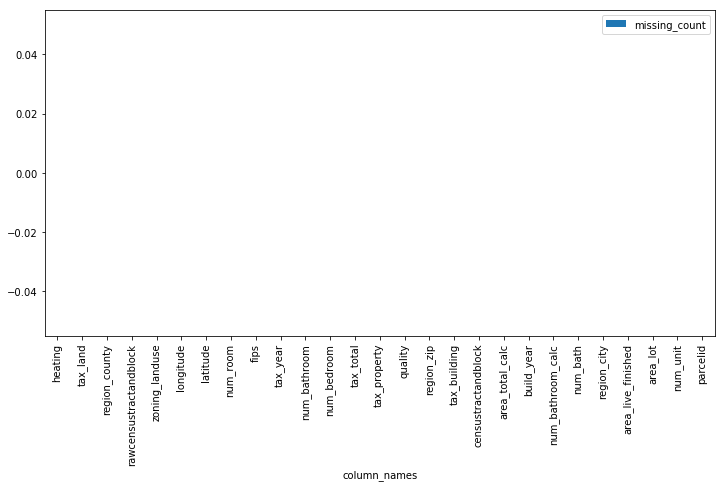

In [15]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median", axis=0)
imputer.fit(props_clean_num)
# Returns Numpy array
X = imputer.transform(props_clean_num)
# Put back into Pandas DataFrame
props_clean_num = pd.DataFrame(X, columns=props_clean_num.columns)

missing = get_missing(props_clean_num)
missing.plot.bar(figsize=(12, 6))
plt.show()

## [In-progress] Encode categorical features

In [16]:
cat_features = ['zoning_property', 'zoning_landuse_county']
props_clean_cat = props_clean[cat_features]


for col_name in cat_features:
    # Fill missing values, which cause encoders to fail
    # TODO: Fix SettingWithCopyWarning here
    props_clean_cat.loc[:,col_name] = props_clean_cat.loc[:,col_name].fillna('NaN')
    print('Name:', col_name)
    print('Unique count:', len(props_clean_cat[col_name].unique()))
    print(props_clean_cat[col_name].unique())

print(props_clean_cat.head(10))

props_clean_cat['zoning_property'].unique()

Name: zoning_property
Unique count: 1997
['LARS' 'NaN' 'PSR6' ..., 'SHCG' 'COR2YY' 'LNR2RPD-R3']
Name: zoning_landuse_county
Unique count: 78
['0100' '1' '010C' '122' '1129' '34' '1128' '010E' '0104' '0101' '0200'
 '0700' '1111' '01DC' '010D' '1110' '0400' '012C' '010V' '1116' '01HC'
 '010G' '0300' '010F' '1117' 'NaN' '0103' '38' '1210' '0111' '010M' '96'
 '135' '0108' '1014' '1112' '0201' '0109' '1310' '010H' '1410' '1222'
 '1321' '1720' '1011' '1432' '0401' '0102' '012D' '73' '105' '0110' '100V'
 '0130' '8800' '0303' '0210' '1012' '1333' '0114' '01DD' '020G' '040A'
 '012E' '020M' '040V' '070D' '1200' '030G' '1722' '6050' '1421' '010' '200'
 '0' '1420' '0131' '0301']
  zoning_property zoning_landuse_county
0            LARS                  0100
1             NaN                     1
2            PSR6                  0100
3            LAR3                  010C
4             NaN                   122
5          HBR3YY                  0100
6           CORH*                  0100
7  

/Users/jtb/anaconda/envs/ml/lib/python3.6/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


array(['LARS', 'NaN', 'PSR6', ..., 'SHCG', 'COR2YY', 'LNR2RPD-R3'], dtype=object)

In [17]:
# Convert text categorical features to integer then one-hot vectors
from sklearn.preprocessing import LabelBinarizer
    
encoder = LabelBinarizer()
# NOTE: LabelBinarizer.fit_transform() returns Numpy sparse array by default
# TODO: Make this work for all cat columns!
props_clean_cat_1hot = encoder.fit_transform(props_clean_cat['zoning_landuse_county'])
props_clean_cat_1hot

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

# Find correlations

In [18]:
# Look for linear correlations
corr_matrix = properties.corr()
corr_matrix['logerror'].sort_values(ascending=False)

logerror                    1.000000
area_basement               0.253395
area_shed                   0.086179
area_live_finished          0.041922
area_total_calc             0.038784
area_base                   0.036847
area_liveperi_finished      0.034715
num_75_bath                 0.034069
num_fireplace               0.033235
num_bathroom_calc           0.029448
num_bath                    0.028845
num_bathroom                0.027889
num_garage                  0.026531
area_firstfloor_finished    0.026242
num_bedroom                 0.025467
area_garage                 0.023888
area_unknown                0.023619
tax_building                0.022085
area_total_finished         0.019327
build_year                  0.017312
num_story                   0.013075
censustractandblock         0.008892
rawcensustractandblock      0.008376
fips                        0.008363
tax_total                   0.006508
num_room                    0.005760
aircon                      0.005179
l

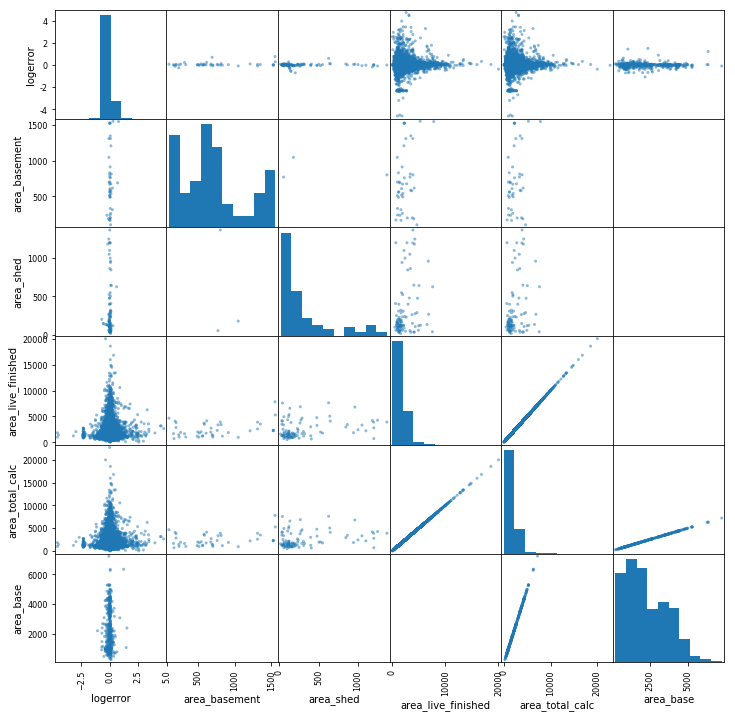

In [19]:
# Pick a handful of features to look for non-linear correlations
key_features = ['area_basement', 'area_shed', 'area_live_finished', 'area_total_calc', 'area_base']

from pandas.plotting import scatter_matrix

scatter_matrix(properties[list(['logerror'] + key_features)], figsize=(12, 12))
plt.show()

# Train models!!!

In [20]:
# Get final data set to train
num_attribs = list(props_clean_num)

# Models don't work with datetime data types.  Who knew.  Only pure numeric then ok.
# TODO: Convert 'transactiondate' to appropriate numeric representation of datetime
#date_attribs = ['transactiondate']
#final_props_data = pd.concat([props_clean_num[num_attribs], props_clean[date_attribs]], axis=1)

final_props_data = props_clean_num[num_attribs]
final_props_data

,heating,quality,num_unit,area_lot,area_live_finished,region_city,num_bath,num_bathroom_calc,build_year,area_total_calc,...,num_bathroom,tax_year,fips,num_room,latitude,longitude,zoning_landuse,rawcensustractandblock,region_county,parcelid
0,2.0,4.0,1.0,7528.0,1684.0,12447.0,2.0,2.0,1959.0,1684.0,...,2.0,2015.0,6037.0,0.0,34280990.0,-118488536.0,261.0,6.037107e+07,3101.0,11016594.0
1,2.0,7.0,1.0,3643.0,2263.0,32380.0,3.0,3.5,2014.0,2263.0,...,3.5,2015.0,6059.0,0.0,33668120.0,-117677556.0,261.0,6.059052e+07,1286.0,14366692.0
2,2.0,4.0,1.0,11423.0,2217.0,47019.0,3.0,3.0,1940.0,2217.0,...,3.0,2015.0,6037.0,0.0,34136312.0,-118175032.0,261.0,6.037464e+07,3101.0,12098116.0
3,2.0,4.0,1.0,70859.0,839.0,12447.0,2.0,2.0,1987.0,839.0,...,2.0,2015.0,6037.0,0.0,33755800.0,-118309000.0,266.0,6.037296e+07,3101.0,12643413.0
4,2.0,7.0,1.0,6000.0,2283.0,17686.0,2.0,2.5,1981.0,2283.0,...,2.5,2015.0,6059.0,8.0,33485643.0,-117700234.0,261.0,6.059042e+07,1286.0,14432541.0
5,2.0,1.0,1.0,2708.0,3067.0,29712.0,4.0,4.0,1982.0,3067.0,...,4.0,2015.0,6037.0,0.0,33870089.0,-118402768.0,261.0,6.037621e+07,3101.0,11509835.0
6,7.0,7.0,1.0,6677.0,1297.0,24174.0,1.0,1.0,1939.0,1297.0,...,1.0,2015.0,6037.0,0.0,33899475.0,-118212720.0,261.0,6.037542e+07,3101.0,12286022.0
7,2.0,7.0,1.0,7200.0,1763.0,13150.0,2.0,2.5,1994.0,1763.0,...,2.5,2015.0,6111.0,6.0,34207204.0,-119165589.0,266.0,6.111003e+07,2061.0,17177301.0
8,2.0,7.0,1.0,7200.0,796.0,25459.0,1.0,1.0,1984.0,796.0,...,1.0,2015.0,6059.0,0.0,33549600.0,-117678000.0,266.0,6.059042e+07,1286.0,14739064.0
9,2.0,7.0,1.0,7200.0,1260.0,46098.0,2.0,2.0,1977.0,1260.0,...,2.0,2015.0,6059.0,5.0,33612700.0,-117742000.0,266.0,6.059063e+07,1286.0,14677559.0


In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(final_props_data, props_labels)

# Evaluate results:
some_data = final_props_data.iloc[:5]
some_labels = props_labels.iloc[:5]
print('Predictions of logerror:\t', lin_reg.predict(some_data))
print('Actual values:', list(some_labels))

Predictions of logerror:	 [ 0.00742198 -0.00610355 -0.01293117  0.00854693  0.01533579]
Actual values: [0.0276, -0.16839999999999999, -0.0040000000000000001, 0.0218, -0.0050000000000000001]


In [22]:
from sklearn.metrics import mean_absolute_error
import numpy as np

logerror_predictions = lin_reg.predict(final_props_data)
lin_mae = mean_absolute_error(props_labels, logerror_predictions)
lin_mae

0.069250368940502099

In [23]:
# Train a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(final_props_data, props_labels)
logerror_predictions = tree_reg.predict(final_props_data)
tree_mae = mean_absolute_error(props_labels, logerror_predictions)
tree_mae
# OVERFITS

0.00020700686040237422

## Re-train models using cross-validation

In [27]:
from sklearn.model_selection import cross_val_score

tree_scores = -cross_val_score(tree_reg, final_props_data, props_labels, scoring='neg_mean_absolute_error', cv=10)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
    
display_scores(tree_scores)

Scores: [ 0.11899374  0.11973996  0.11422764  0.11222058  0.11475395  0.10731321
  0.11017481  0.11205138  0.10996986  0.11390926]
Mean: 0.113335437429
Standard deviation: 0.00369658499225


In [28]:
lin_scores = -cross_val_score(lin_reg, final_props_data, props_labels, scoring='neg_mean_absolute_error', cv=10)
display_scores(lin_scores)

Scores: [ 0.07512081  0.0741503   0.07379667  0.06851855  0.07087358  0.06480838
  0.06659595  0.06662342  0.06638294  0.06648064]
Mean: 0.0693351230492
Standard deviation: 0.00363056962362


In [29]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_scores = -cross_val_score(forest_reg, final_props_data, props_labels, scoring='neg_mean_absolute_error', cv=10)
display_scores(forest_scores)

Scores: [ 0.09027624  0.08760703  0.08643581  0.08240482  0.08460351  0.07933812
  0.0817435   0.08148936  0.08073056  0.08227602]
Mean: 0.0836904985865
Standard deviation: 0.00327223827497


In [24]:
# TODO: Implement grid and/or randomized search
# TODO: Analyze model performance & errors in-depth 

# Target for 1st submission is doing better than the Sample Submission Benchmark: 0.0663010

# Produce submission file

# TODOs: 

### Additional data transformations:
- separate data set into date slots (see Zillow instructions)
- filter out logerror top/bottom outliers (see SRK's analysis)
- Finish encoding categorical features properly so they can be included in model if important

### Coding practices:
- Use more self-explanatory variable name for data sets as they move thru processing stages. Look for good conventions here.